<a href="https://colab.research.google.com/github/suni21/Filter/blob/main/Snapchatfilter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install gdown opencv-python mtcnn

     |████████████████████████████████| 2.3MB 7.8MB/s 


In [6]:
import numpy as np
import cv2
from mtcnn import MTCNN
import matplotlib.pyplot as plt

%matplotlib inline

In [7]:
def read_image(image_path):
    image = cv2.imread(image_path)
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [68]:
!wget https://raw.githubusercontent.com/suni21/Filter/main/jichang.jpg

--2021-06-28 17:04:02--  https://raw.githubusercontent.com/suni21/Filter/main/sunglasses_blue.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61302 (60K) [image/jpeg]
Saving to: ‘sunglasses_blue.jpg.1’

sunglasses_blue.jpg 100%[===================>]  59.87K  --.-KB/s    in 0.008s  

2021-06-28 17:04:02 (7.20 MB/s) - ‘sunglasses_blue.jpg.1’ saved [61302/61302]



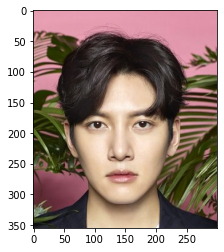

In [9]:
image= cv2.imread("jichang.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [69]:
!wget https://raw.githubusercontent.com/suni21/Filter/main/sunglasses_blue.jpg

--2021-06-28 17:04:37--  https://raw.githubusercontent.com/suni21/Filter/main/sunglasses_blue.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61302 (60K) [image/jpeg]
Saving to: ‘sunglasses_blue.jpg.2’

sunglasses_blue.jpg 100%[===================>]  59.87K  --.-KB/s    in 0.008s  

2021-06-28 17:04:37 (7.77 MB/s) - ‘sunglasses_blue.jpg.2’ saved [61302/61302]



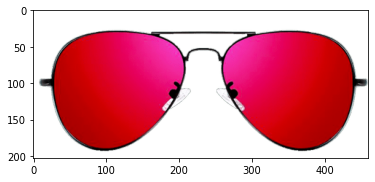

In [70]:
glasses = cv2.imread("sunglasses_blue.jpg", -1)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(glasses)

In [58]:
mtcnn = MTCNN()

In [59]:
faces = mtcnn.detect_faces(image)
faces

[{'box': [70, 105, 152, 210],
  'confidence': 0.9847837686538696,
  'keypoints': {'left_eye': (105, 187),
   'mouth_left': (118, 269),
   'mouth_right': (173, 267),
   'nose': (142, 233),
   'right_eye': (178, 184)}},
 {'box': [241, 81, 23, 29],
  'confidence': 0.7969406247138977,
  'keypoints': {'left_eye': (244, 94),
   'mouth_left': (248, 106),
   'mouth_right': (255, 104),
   'nose': (246, 101),
   'right_eye': (253, 92)}}]

In [60]:
face = faces[0]
face

{'box': [70, 105, 152, 210],
 'confidence': 0.9847837686538696,
 'keypoints': {'left_eye': (105, 187),
  'mouth_left': (118, 269),
  'mouth_right': (173, 267),
  'nose': (142, 233),
  'right_eye': (178, 184)}}

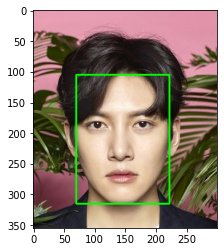

In [61]:
x, y, w, h = face['box']

temp_image = np.copy(image)

temp_image = cv2.rectangle(temp_image, (x, y), (x+w, y+h), (0, 255, 0), 2)

plt.imshow(temp_image)

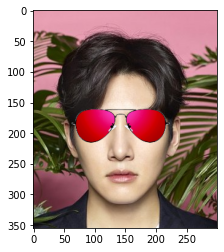

In [71]:
background = np.copy(image)
img_filter = np.copy(glasses)

(x1, y1) , (x2, y2) = (face['keypoints']['left_eye'], face['keypoints']['right_eye'])

x1 -= 45
y1 -= 35
x2 += 45
y2 += 35


h = y2 - y1
w = x2 - x1

img_filter = cv2.resize(img_filter, (w, h))

alpha_filter = img_filter[:, :, 3] / 255.0
alpha_background = 1.0 - alpha_filter

for c in range(0, 3):
    background[y1:y2, x1:x2, c] = (alpha_filter * img_filter[:, :, c] +
                              alpha_background * background[y1:y2, x1:x2, c])



plt.imsave("final_image.png", background)
plt.imshow(background)

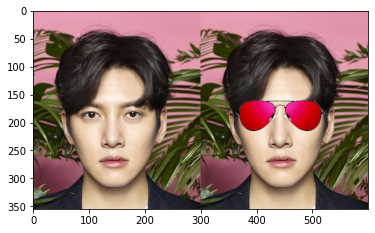

In [73]:
snapchat_filter = np.hstack((image, background))

plt.imsave("snapfilter.png", snapchat_filter)
plt.imshow(snapchat_filter)